<a href="https://colab.research.google.com/github/Tydos/Interpretable-ML-Models/blob/main/Linear%20Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

This notebook implements linear regression using the popular diabetes dataset used for regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [2]:
X = load_diabetes().data
y = load_diabetes().target
cols = load_diabetes().feature_names

print(X[1],y[1],cols)

[-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06833155 -0.09220405] 75.0 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [3]:
X_train, X_test, ytrain, y_test = train_test_split(X,y,test_size=0.2)
print(len(X_train))
print(len(X_test))

353
89


We have to predict y = w*x+b

10 features -> 10 weights, 10 biases

### Closed form solution

Closed-form solutions are best suited for problems with a small number of features. The dominant computational cost comes from inverting the feature covariance matrix, which has o(n^3) complexity in the number of features and therefore does not scale well to high-dimensional datasets.

In [4]:
#closed form solution - this one passes through origin
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

def normal_bias_equation(X,y):
  #add bias using numpy column concat function
  len_features = X.shape[0]
  bias = np.ones((len_features,1)) #create matrix of size 1*n
  X_b = np.c_[bias,X]

  theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
  return theta

def lstsq_normal(X,y):
  len_features = X.shape[0]
  bias = np.ones((len_features,1)) #create matrix of size 1*n
  X_b = np.c_[bias,X]

  return np.linalg.lstsq(X_b,y,rcond=None)


In [5]:
w = normal_equation(X_train,ytrain)
for i, col in enumerate(cols):
  print(f"{col}: {w[i]}")

age: 85.25674530871807
sex: -174.25594762641114
bmi: 623.8522849037925
bp: 281.4862673513775
s1: 241.24999065178258
s2: -365.23057431711237
s3: -384.7055494095366
s4: -5.287195581465566
s5: 358.6387048694131
s6: 125.02324981576633


In [6]:
w = normal_bias_equation(X_train,ytrain)
for i, col in enumerate(cols):
  print(f"{col}: {w[i]}")


age: 154.07732976983522
sex: 41.58523983367485
bmi: -254.5440265090487
bp: 530.4859921250252
s1: 325.26123988407204
s2: -918.4468038893567
s3: 523.2438360214644
s4: 194.37081128131334
s5: 296.557689321268
s6: 734.618459498049


In [7]:
w, residual, rank, s = lstsq_normal(X_train,ytrain)
for i, col in enumerate(cols):
  print(f"{col}: {w[i]}")

print(residual)
print(rank)
print(s)


age: 154.0773297698354
sex: 41.58523983367479
bmi: -254.5440265090503
bp: 530.4859921250227
s1: 325.2612398840721
s2: -918.4468038893579
s3: 523.2438360214666
s4: 194.3708112813148
s5: 296.55768932127074
s6: 734.6184594980506
[1009410.63564905]
11
[18.78838559  1.80767473  1.05795449  0.95973396  0.89238246  0.73455254
  0.69699025  0.67511013  0.58795633  0.24453262  0.08706457]


### Gradient descent solution

In [12]:
#TODO


### Assumptions of Linear Regression


---
### 1. Linearity (in parameters)
**Intuition:**  
Each feature contributes additively and proportionally to the prediction.

**Violation symptoms:**  
- Residuals vs. predicted values show curved patterns  
- Systematic under- or over-prediction in certain ranges  

**Fixes:**  
- Add polynomial or interaction terms  
- Transform features (log, square root, etc.)  
- Use a non-linear model if necessary  
---

### 3. Homoscedasticity (constant error variance)
**Intuition:**  
The model should be equally confident across all prediction ranges.

**Violation symptoms:**  
- Residual plot shows a fan or cone shape  
- Errors increase with the magnitude of predictions  

**Fixes:**  
- Transform the target variable (log, Box–Cox)  
- Use weighted least squares  
- Apply heteroscedasticity-robust standard errors  

---

### 4. Normality of errors (mainly for inference)
**Intuition:**  
Normally distributed errors allow reliable confidence intervals and hypothesis tests.

**Violation symptoms:**  
- Skewed or heavy-tailed residual distribution  
- Strong deviations from the diagonal in a Q–Q plot  

**Fixes:**  
- Transform the target variable  
- Use bootstrapping methods  
- Often ignorable for prediction with large sample sizes  

---

### 5. No (or low) multicollinearity
**Intuition:**  
Each feature should explain unique information about the target.

**Violation symptoms:**  
- Large standard errors for coefficients  
- Unstable coefficients or unexpected sign changes  
- High Variance Inflation Factor (VIF)  

**Fixes:**  
- Remove or combine correlated features  
- Apply dimensionality reduction (e.g., PCA)  
- Use regularization techniques (Ridge, Lasso)  



# Data Analysis

### Feature–Target Linearity Diagnostics

This visualization assesses the **linearity assumption** of linear regression by plotting each feature against the target variable with an overlaid linear fit.

#### Method
- Each subplot displays one feature versus the target.
- A scatter plot shows the raw relationship.
- A fitted linear regression line highlights the linear trend.

#### Interpretation
- **Approximately straight trend** → Linear relationship is plausible.
- **Clear curvature** → Indicates non-linearity; consider transformations or polynomial terms.
- **Flat or noisy pattern** → Feature may have weak explanatory power.
- **Uneven spread of points** → May suggest heteroscedasticity.

#### Purpose
These plots provide a **feature-level diagnostic** to identify non-linear relationships before or during model specification and complement residual-based diagnostics.


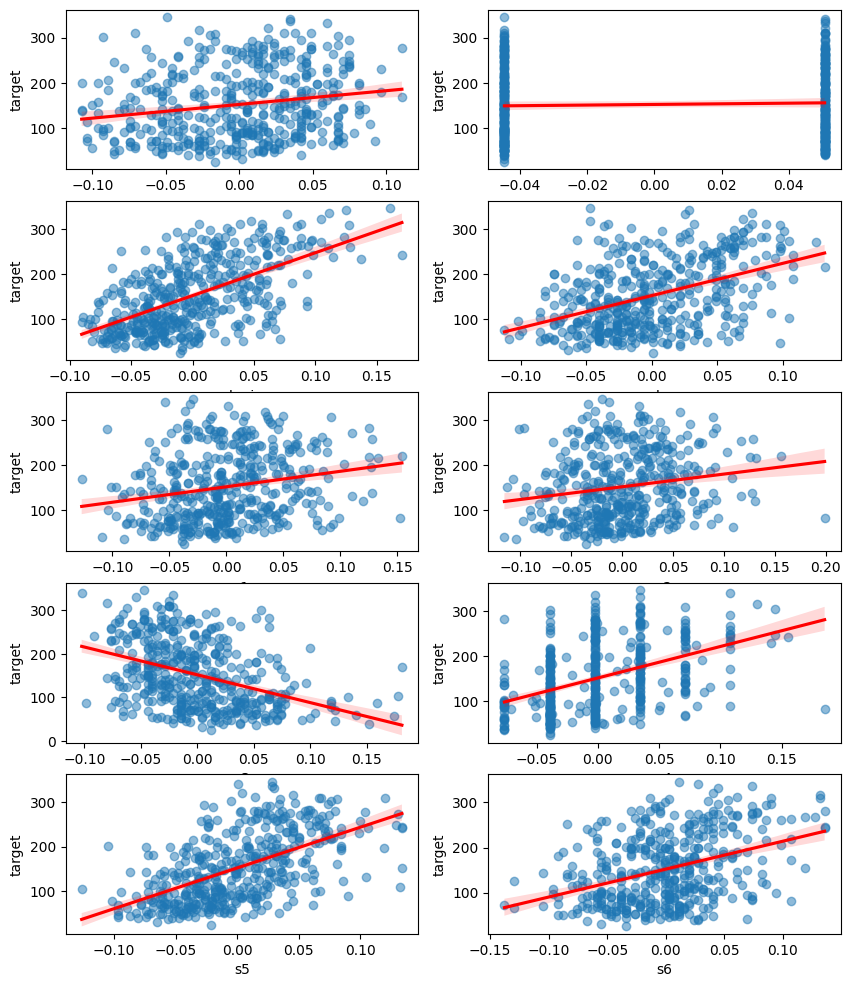

In [8]:
#for each feature, plot feature vs target to check for linearity
df = pd.DataFrame(X,columns=cols)
df['target'] = y

fig, axes = plt.subplots(5, 2, figsize=(10, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
  plt.subplot(5,2,i+1)
  sns.regplot(x=df[col],y=df['target'],ax=axes[i],scatter_kws={'alpha':0.5},line_kws={'color':'red'})

plt.show()


### Residual Diagnostics: Linearity and Homoscedasticity

This code fits a linear regression model and evaluates key assumptions using a **residuals vs. predicted values** plot.

- **Linearity**  
  Residuals should be randomly scattered around zero with no systematic pattern. Curvature or structure suggests non-linear relationships or missing terms.

- **Homoscedasticity**  
  The spread of residuals should remain approximately constant across all predicted values. A funnel or cone shape indicates heteroscedasticity.

**Desired outcome:**  
A horizontal band of points centered at zero with uniform spread across the x-axis.

This plot serves as an initial diagnostic; additional feature-level residual plots and formal statistical tests may be used for confirmation.


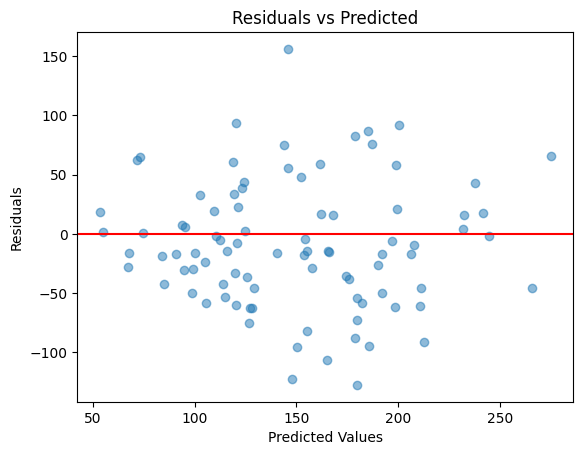

In [9]:
#check residual plots for linearity, homoscedascity
lr = LinearRegression()
lr.fit(X_train, ytrain)

y_pred = lr.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


### Statistical Testing

#### Ramsey RESET Test

**Purpose**  
Tests whether non-linear combinations of the fitted values add explanatory power to the model.

**Hypotheses**  
- **H₀**: The model is correctly specified (linear)
- **H₁**: The model is misspecified (non-linear terms are missing)

**Interpretation**  
- **p-value < 0.05** → Evidence of non-linearity  
- **p-value ≥ 0.05** → Linearity assumption is plausible


In [11]:
#Ramsey Reset
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset

X_ = sm.add_constant(X_train)
model = sm.OLS(ytrain, X_).fit()

reset = linear_reset(model, power=2, use_f=True)
print(reset)


<F test: F=4.542750129996385, p=0.03377312926508481, df_denom=341, df_num=1>



#### Breusch–Pagan Test
**Purpose:**  
Tests whether residual variance depends on the predictors.

**Hypotheses:**  
- **H₀:** Residuals are homoscedastic  
- **H₁:** Residuals are heteroscedastic

**Decision Rule:**  
- *p-value < 0.05* → Evidence of heteroscedasticity  
- *p-value ≥ 0.05* → Homoscedasticity plausible


In [14]:
from statsmodels.stats.diagnostic import het_breuschpagan

X_ = sm.add_constant(X_train)
model = sm.OLS(ytrain, X_).fit()

bp_test = het_breuschpagan(model.resid, model.model.exog)

print(bp_test)

(np.float64(21.448252673029593), np.float64(0.018175863194486837), np.float64(2.212415550005283), np.float64(0.016782781794673456))


In [15]:

labels = ['LM Statistic', 'LM p-value', 'F-Statistic', 'F p-value']
bp_results = dict(zip(labels, bp_test))
print(bp_results)

{'LM Statistic': np.float64(21.448252673029593), 'LM p-value': np.float64(0.018175863194486837), 'F-Statistic': np.float64(2.212415550005283), 'F p-value': np.float64(0.016782781794673456)}


#### Shapiro–Wilk Test
**Purpose:**  
Tests whether residuals follow a normal distribution.

**Hypotheses:**  
- **H₀:** Residuals are normally distributed  
- **H₁:** Residuals are not normally distributed

**Decision Rule:**  
- *p-value < 0.05* → Normality violated  


In [18]:
from scipy.stats import shapiro
X_ = sm.add_constant(X_train)
model = sm.OLS(ytrain, X_).fit()
residuals = model.resid
stat, p_value = shapiro(residuals)

print(f"SW Statistic: {stat:.4f}, p-value: {p_value:.4f}")

SW Statistic: 0.9958, p-value: 0.4750



#### Variance Inflation Factor (VIF)
**Purpose:**  
Measures how strongly a predictor is linearly related to other predictors.

**Rule of Thumb:**  
- VIF > 5 → Moderate multicollinearity  
- VIF > 10 → Severe multicollinearity



In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
dfX = pd.DataFrame(X,columns=cols)
X_ = sm.add_constant(dfX)

vif_data = pd.DataFrame()
vif_data['feature'] = X_.columns
vif_data['VIF'] = [variance_inflation_factor(X_.values, i)
                   for i in range(X_.shape[1])]

print(vif_data)

   feature        VIF
0    const   1.000000
1      age   1.217307
2      sex   1.278071
3      bmi   1.509437
4       bp   1.459428
5       s1  59.202510
6       s2  39.193370
7       s3  15.402156
8       s4   8.890986
9       s5  10.075967
10      s6   1.484623


# Model Interpretablility